In [1]:
import pandas as pd
from math import sin, cos, asin, sqrt, pi
import matplotlib
import geopandas
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("water_main_breaks.csv")

In [3]:
df = df.sort_values("break_year",ignore_index = True)

In [4]:
df.head()

,X,Y,OBJECTID,Cell_rotation,mslink,break_num,pipe_mslink,pipe_type,break_date,house_num,...,created_user,created_date,last_edited_user,last_edited_date,BreakType,BreakTypeOther,StreetSegmentID,CWWOID,CWWOClosedDate,TotalHoursWaterOff
0,-89.323967,43.088787,6375,30.478264,6908.0,135.0,12532.0,MAIN,1970/01/01 00:00:00+00,NaN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,2610.0,NaN,1970/01/01 00:00:00+00,NaN
1,-89.447438,43.068591,6377,359.603427,6925.0,152.0,20842.0,MAIN,1970/01/01 00:00:00+00,NaN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,5751.0,NaN,1970/01/01 00:00:00+00,NaN
2,-89.363700,43.120870,1167,359.602956,1353.0,0.0,15850.0,MAIN,1970/01/01 00:00:00+00,NaN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,1257.0,NaN,1970/01/01 00:00:00+00,NaN
3,-89.309090,43.113687,164,359.602744,414.0,0.0,15513.0,MAIN,1970/01/01 00:00:00+00,NaN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,1856.0,NaN,1970/01/01 00:00:00+00,NaN
4,-89.396536,43.037669,1522,359.603285,1708.0,0.0,19070.0,MAIN,1970/01/01 00:00:00+00,NaN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,6247.0,NaN,1970/01/01 00:00:00+00,NaN


In [5]:
ms = geopandas.read_file("zip://Zoning_Districts-shp.zip")

In [6]:
x = df["X"].values
y = df["Y"].values

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

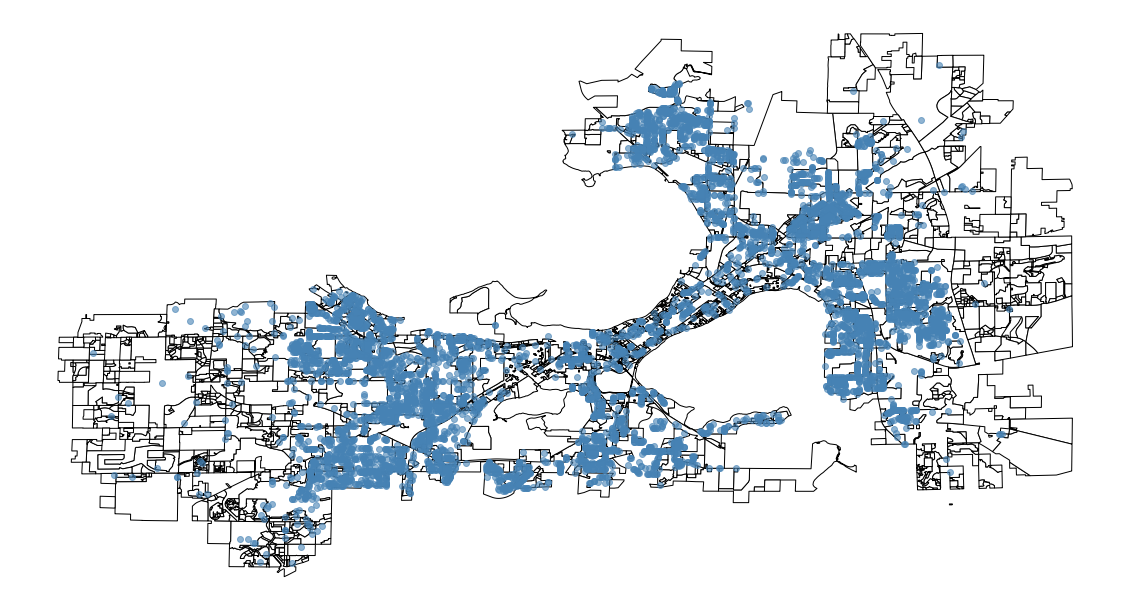

In [7]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolors = "black",ax=ax)
ax.scatter(x,y,color = "steelblue",edgecolor = "steelblue",alpha = 0.6)
ax.axis("off")
#plt.savefig("water_breaks.png")

In [8]:
yedge = ax.get_ylim()
xedge = ax.get_xlim()

In [9]:
yedge,xedge

((42.98945303094492, 43.180714182328316),
 (-89.58776742567994, -89.23054231969978))

In [10]:
wmb = geopandas.read_file("zip://water_main_breaks.zip")

(-89.58776742567994, -89.23054231969978, 42.98945303094492, 43.180714182328316)

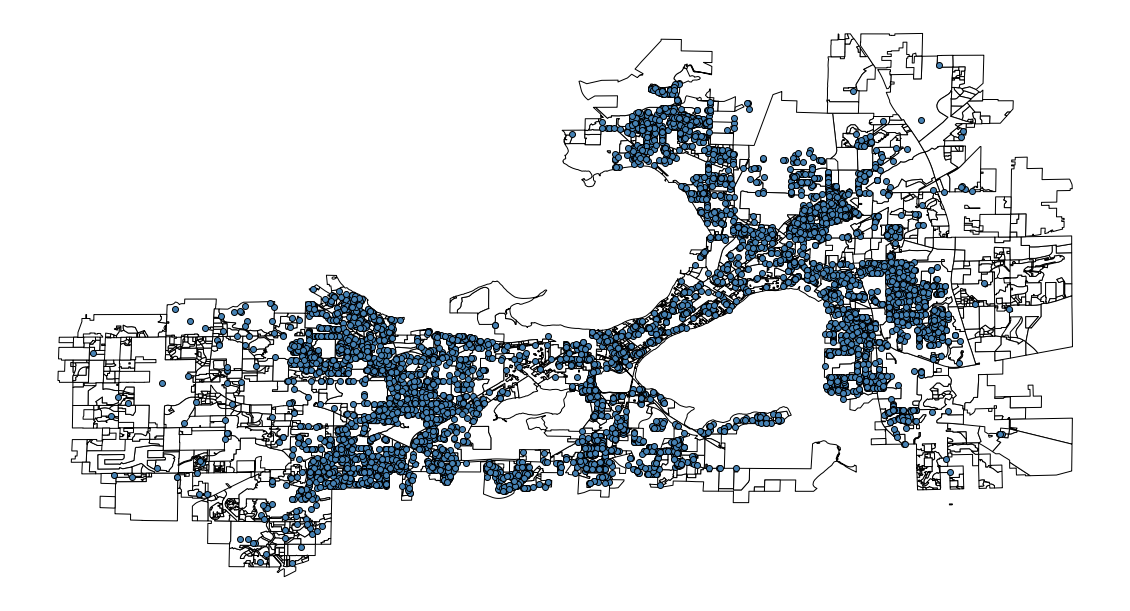

In [11]:
fig,ax = plt.subplots(figsize=(20,20))
ms.plot(color = "white",edgecolor = "black",ax=ax)
wmb.plot(color = "steelblue",edgecolor = "black",ax=ax)
ax.axis("off")

In [12]:
wmb = wmb.sort_values("break_year",ignore_index = True)

In [13]:
wmb["break_year"].unique()

array([ 135.,  152., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019., 2020.,   nan])

In [14]:
wmb["break_year"]

0        135.0
1        152.0
2       1980.0
3       1980.0
4       1980.0
         ...  
6988       NaN
6989       NaN
6990       NaN
6991       NaN
6992       NaN
Name: break_year, Length: 6993, dtype: float64

In [15]:
df["pipe_depth_ft"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6988   NaN
6989   NaN
6990   NaN
6991   NaN
6992   NaN
Name: pipe_depth_ft, Length: 6993, dtype: float64

In [25]:
new_df = df[df["break_date"] != "1970/01/01 00:00:00+00"]

In [34]:
new_df = new_df.reset_index()
new_df

,level_0,index,X,Y,OBJECTID,Cell_rotation,mslink,break_num,pipe_mslink,pipe_type,...,created_user,created_date,last_edited_user,last_edited_date,BreakType,BreakTypeOther,StreetSegmentID,CWWOID,CWWOClosedDate,TotalHoursWaterOff
0,0,2472,-89.354410,43.086486,3776,44.602393,3839.0,118.0,14212.0,MAIN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,2603.0,NaN,1970/01/01 00:00:00+00,NaN
1,1,2514,-89.320646,43.106856,3600,359.602808,3787.0,64.0,15692.0,MAIN,...,NaN,1970/01/01 00:00:00+00,WUPTB,2018/02/15 14:37:32+00,NaN,NaN,1992.0,NaN,1970/01/01 00:00:00+00,NaN
2,2,2562,-89.487052,43.082415,5470,0.906010,6032.0,5.0,11178.0,MAIN,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,747.0,NaN,1970/01/01 00:00:00+00,NaN
3,3,2680,-89.450269,43.075753,5475,358.761627,6036.0,84.0,20298.0,MAIN,...,NaN,1970/01/01 00:00:00+00,WUPTB,2019/02/25 19:29:37+00,NaN,NaN,5912.0,NaN,1970/01/01 00:00:00+00,NaN
4,4,2681,-89.336674,43.126258,5477,359.113241,6038.0,90.0,99.0,MAIN,...,NaN,1970/01/01 00:00:00+00,WUPTB,2019/02/25 19:29:37+00,NaN,NaN,2386.0,NaN,1970/01/01 00:00:00+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,3794,6873,-89.451710,43.033167,39439,NaN,NaN,72.0,NaN,MAIN,...,WUJAG,2019/07/18 13:48:08+00,WUPTB,2019/10/15 16:23:54+00,9288,NaN,NaN,NaN,1970/01/01 00:00:00+00,2.5
3795,3795,6874,-89.452081,43.033658,39438,NaN,NaN,71.0,NaN,MAIN,...,WUJAG,2019/07/18 13:46:33+00,WUPTB,2019/10/15 16:23:54+00,9287,NaN,NaN,NaN,1970/01/01 00:00:00+00,1.0
3796,3796,6875,-89.457392,43.054542,39441,NaN,NaN,74.0,NaN,MAIN,...,WUJAG,2019/07/18 13:50:33+00,WUPTB,2019/10/15 16:23:54+00,9290,NaN,NaN,NaN,1970/01/01 00:00:00+00,1.5
3797,3797,6976,-89.309304,43.124972,49051,NaN,NaN,59601.0,NaN,MAIN,...,WUJAG,2020/02/10 17:44:14+00,WUJAG,2020/02/10 17:44:51+00,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN


In [33]:
new_df["pipe_depth_ft"].head()

0       3.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3794    5.0
3795    5.0
3796    5.0
3797    NaN
3798    NaN
Name: pipe_depth_ft, Length: 3799, dtype: float64